In [ ]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Cleaning
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Feature selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import  classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# Warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


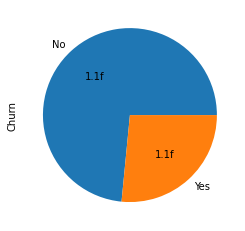

In [ ]:
 df['Churn'].value_counts().plot.pie(autopct='1.1f')
 plt.show()

In [ ]:
### CLeaning and Preprocessing Data

In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
740.8       1
5294.6      1
2483.05     1
2524.45     1
24.75       1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
df['TotalCharges'].replace(' ',np.nan,inplace=True)   
df['TotalCharges']=df['TotalCharges'].astype('float')   
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [ ]:
df['TotalCharges'].value_counts()

20.200000      11
2283.300441    11
19.750000       9
19.900000       8
19.650000       8
               ..
1066.150000     1
249.950000      1
8333.950000     1
7171.700000     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
df_cat=df.select_dtypes(object)

------------
gender


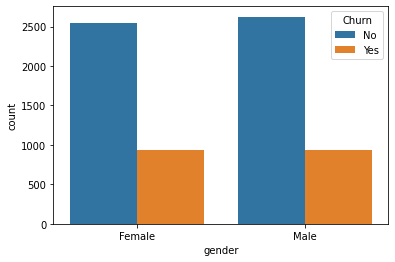

------------
Partner


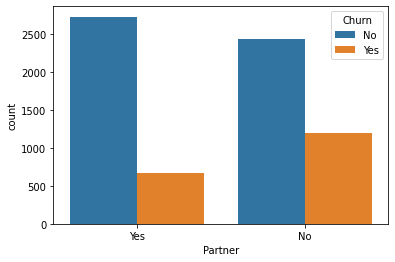

------------
Dependents


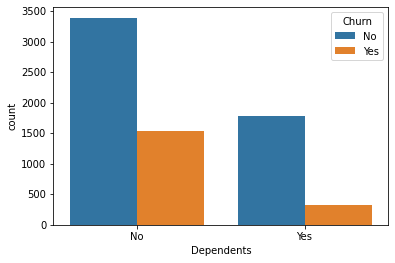

------------
PhoneService


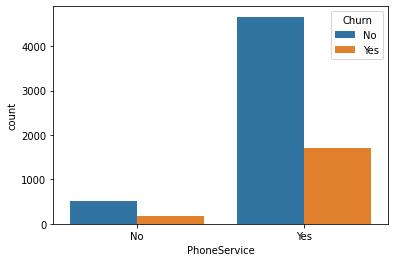

------------
MultipleLines


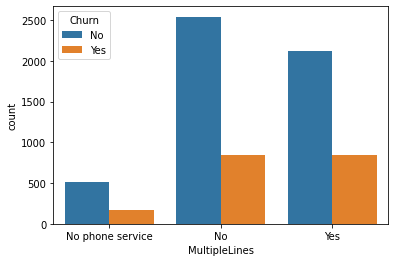

------------
InternetService


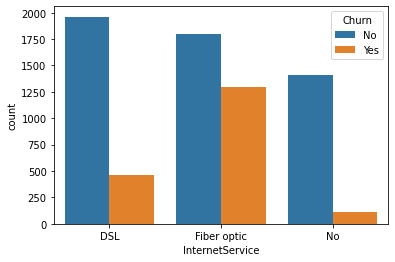

------------
OnlineSecurity


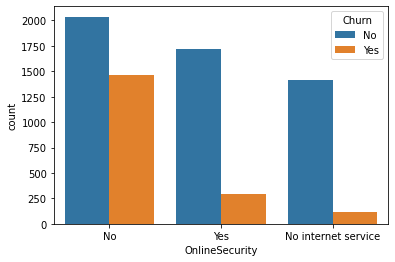

------------
OnlineBackup


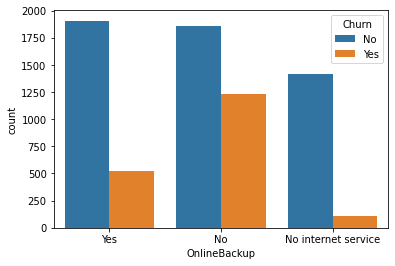

------------
DeviceProtection


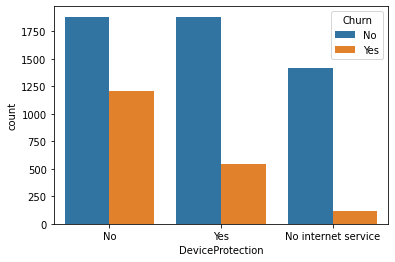

------------
TechSupport


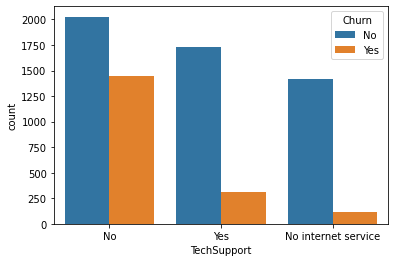

------------
StreamingTV


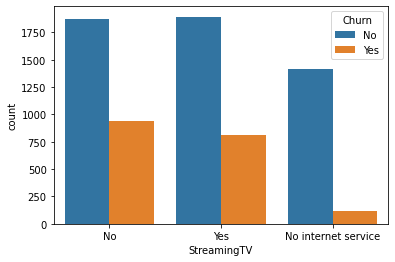

------------
StreamingMovies


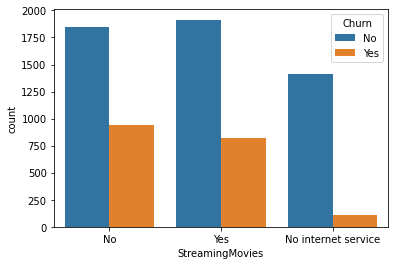

------------
Contract


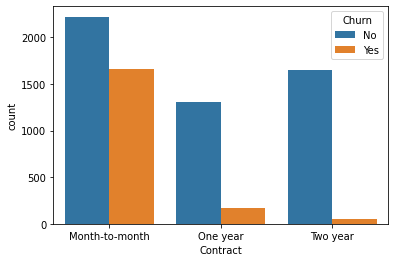

------------
PaperlessBilling


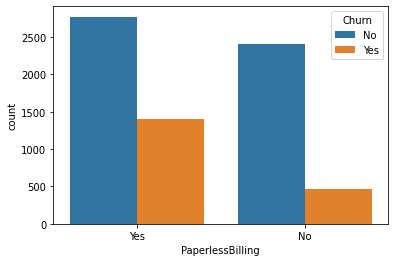

------------
PaymentMethod


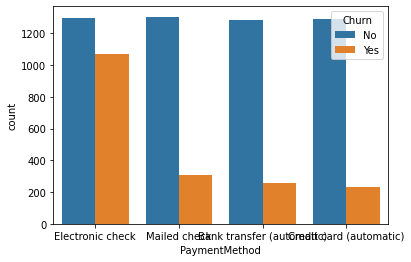

------------
Churn


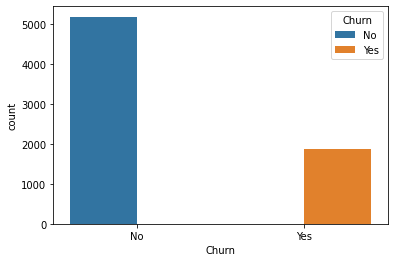

In [ ]:
for col in df_cat:
  print('------------')
  print(col)
  plt.figure()
  sns.countplot(data=df_cat,x=col,hue='Churn')
  plt.show()


In [ ]:
le=LabelEncoder()

In [ ]:
for col in df_cat:
  df_cat[col]=le.fit_transform(df_cat[col])

In [ ]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
df_num=df[['tenure','MonthlyCharges','TotalCharges']]

In [ ]:
df_num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


---------
tenure
0.2394887299846216


<Figure size 432x288 with 0 Axes>

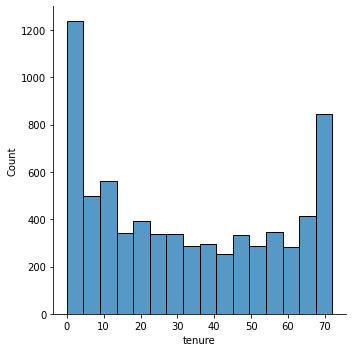

---------
MonthlyCharges
-0.2204774644391769


<Figure size 432x288 with 0 Axes>

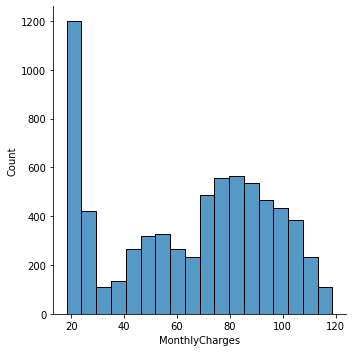

---------
TotalCharges
0.962189042660014


<Figure size 432x288 with 0 Axes>

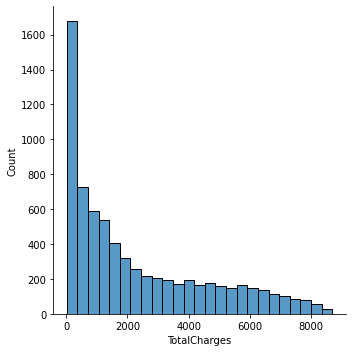

In [ ]:
for col in df_num:
  print('---------')
  print(col)
  print(skew(df_num[col]))
  plt.figure()
  sns.displot(df_num[col])
  plt.show()

In [ ]:
df_new=pd.concat([df_num,df_cat,df['SeniorCitizen']],axis=1)

In [ ]:
df_new.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0
2,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
3,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0
4,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0


In [ ]:
def create_model(model,X_train,X_test):
  model.fit(X_train,y_train)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  return model

In [ ]:
X=df_new.drop('Churn',axis=1)
y=df_new['Churn']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [ ]:
lr=LogisticRegression()


In [ ]:
create_model(lr,X_train,X_test)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
annova=SelectKBest(score_func=f_regression,k=8)

In [ ]:
X_train_f=annova.fit_transform(X_train,y_train)

In [ ]:
X_train_f=annova.fit_transform(X_train,y_train)
X_test_f=annova.transform(X_test)

In [ ]:
annova.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
        True,  True, False,  True, False, False,  True,  True, False,
       False])

In [ ]:
df_new.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn', 'SeniorCitizen'],
      dtype='object')

In [ ]:
create_model(lr,X_train_f,X_test_f)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1585
           1       0.60      0.60      0.60       528

    accuracy                           0.80      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.80      0.80      0.80      2113



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
chi2=SelectKBest(score_func=chi2,k=8)

In [ ]:
X_train_f=chi2. _transform(X_train,y_train)
X_test_f=chi2.transform(X_test)

In [ ]:
create_model(lr,X_train_f,X_test_f)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1585
           1       0.60      0.60      0.60       528

    accuracy                           0.80      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.80      0.80      0.80      2113



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt=create_model(dt,X_train,X_test)

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1585
           1       0.47      0.52      0.49       528

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.65      2113
weighted avg       0.74      0.73      0.74      2113



In [ ]:
dt.feature_importances_

array([0.12085997, 0.20505279, 0.21016539, 0.02765092, 0.02788384,
       0.01471798, 0.0013307 , 0.02196803, 0.00940159, 0.04476397,
       0.01666423, 0.01550994, 0.01958017, 0.00721365, 0.00950114,
       0.16119734, 0.01829497, 0.05047859, 0.01776479])

In [ ]:
df_new.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn', 'SeniorCitizen'],
      dtype='object')

In [ ]:
dt2=DecisionTreeClassifier(max_depth=4)

In [ ]:
create_model(dt2,X_train,X_test)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1585
           1       0.56      0.70      0.62       528

    accuracy                           0.79      2113
   macro avg       0.73      0.76      0.74      2113
weighted avg       0.81      0.79      0.79      2113



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
rf=RandomForestClassifier(max_depth=4)

In [ ]:
create_model(rf,X_train,X_test)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.65      0.56      0.60       528

    accuracy                           0.82      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.81      0.82      0.81      2113



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf=RandomForestClassifier(max_features=4,random_state=1)

In [ ]:
create_model(rf,X_train,X_test)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1585
           1       0.62      0.55      0.58       528

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
ada=AdaBoostClassifier()

In [ ]:
create_model(ada,X_train,X_test)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.62      0.57      0.59       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.80      0.81      0.80      2113



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
svc=LinearSVC(random_state=1)

In [ ]:
create_model(svc,X_train,X_test)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1585
           1       0.39      0.36      0.37       528

    accuracy                           0.70      2113
   macro avg       0.59      0.59      0.59      2113
weighted avg       0.69      0.70      0.69      2113



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [ ]:
svc=LinearSVC(random_state=1,C=0.9)

In [ ]:
create_model(svc,X_train,X_test)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1585
           1       0.53      0.70      0.61       528

    accuracy                           0.77      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.77      0.78      2113



LinearSVC(C=0.9, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.svm import SVC

In [ ]:
poly_svc=SVC(random_state=1,kernel='poly')


In [ ]:
create_model(poly_svc,X_train,X_test)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1585
           1       0.00      0.00      0.00       528

    accuracy                           0.75      2113
   macro avg       0.38      0.50      0.43      2113
weighted avg       0.56      0.75      0.64      2113



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
radial_svc=SVC(random_state=1,kernel='rbf')

In [ ]:
create_model(radial_svc,X_train,X_test)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1585
           1       0.00      0.00      0.00       528

    accuracy                           0.75      2113
   macro avg       0.38      0.50      0.43      2113
weighted avg       0.56      0.75      0.64      2113



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
 rus=RandomUnderSampler()


In [ ]:
X_sample1, y_sample1=rus.fit_sample(X_train,y_train)

In [ ]:
dt_sample=DecisionTreeClassifier(max_depth=4)

In [ ]:
dt_sample.fit(X_sample1,y_sample1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=dt_sample.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1585
           1       0.48      0.82      0.60       528

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.81      0.73      0.75      2113



In [ ]:
pd.Series(y_sample1).value_counts()

1    1341
0    1341
dtype: int64

In [ ]:
ros=RandomOverSampler()

In [ ]:
X_sample2, y_sample2=rus.fit_sample(X_train,y_train)

In [ ]:
dt_sample=DecisionTreeClassifier(max_depth=4)

In [ ]:
dt_sample.fit(X_sample2,y_sample2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1585
           1       0.48      0.82      0.60       528

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.81      0.73      0.75      2113



In [ ]:
pd.Series(y_sample2).value_counts()

1    1341
0    1341
dtype: int64